In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joypy import joyplot
from scipy.spatial.distance import pdist, squareform
import geopandas as gpd
from geodatasets import get_path
import seaborn as sns
#import branca.colormap as cm
from warnings import filterwarnings
filterwarnings('ignore')


In [302]:
df = pd.read_csv('training_data.csv')

## Part I: Descriptive Analysis

a) Check out this page: https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Ohio. In around 250
words, summarize the Covid-19 experience of Ohio. Specifically, focus on how Ohio is different or
similar to other US states in terms of the intensity of the pandemic (i), the time and the content
of the different policies that have been implemented (ii), and if Wikipedia ‘thinks’ Ohio has dealt
with Covid-19 successfully (or not) (iii)

b) Find the average values for all the topic awareness variables. Create a bar chart that shows the
average normalized Jaccard similarity-based awareness values for all different types of awareness
topics listed above. Order the bars from the biggest to the smallest. Summarize your observations
in around 100 words.

In [ ]:
#df.columns.tolist()

In [30]:
awareness_df = df.drop(['county','cases', 'deaths', 'date_index_converted', 'county_data_length', 'total_pop',
'percent_25_34', 'percent_highschool', 'labor_force_rate', 'unemployment_rate', 'median_housing_cost',
 'median_household_earnings', 'median_worker_earnings', 'percent_insured', 'percent_married', 'poverty_rate',
 'median_property_value', 'percent_white'], axis = 1)

In [31]:
#awareness_df.columns.tolist()

In [32]:
awareness_avg = awareness_df.mean()

In [33]:
jacc_avg = awareness_avg[awareness_avg.index.str.contains('jaccard_normalized')].sort_values(ascending=False)
#len(jacc_avg) #21 columns

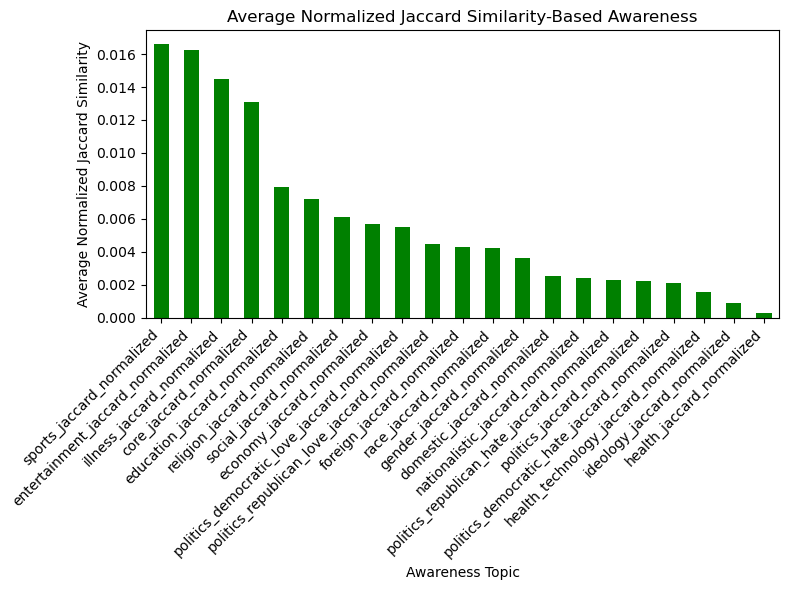

In [34]:
# creating barplot 
plt.figure(figsize=(8, 6))
jacc_avg.plot(kind='bar', color='green')
plt.title('Average Normalized Jaccard Similarity-Based Awareness')
plt.xlabel('Awareness Topic')
plt.ylabel('Average Normalized Jaccard Similarity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Jaccard similarity refers to 

c) Focus on the core_jaccard_normalized variable. Create a bar chart that shows the aggregated mean awareness value for each county. Order the bars from the biggest to the smallest. Which county has the highest awareness? Summarize your observations in around 100 words.

In [35]:
core_jacc_avg = df.groupby('county')['core_jaccard_normalized'].mean().sort_values(ascending=False)


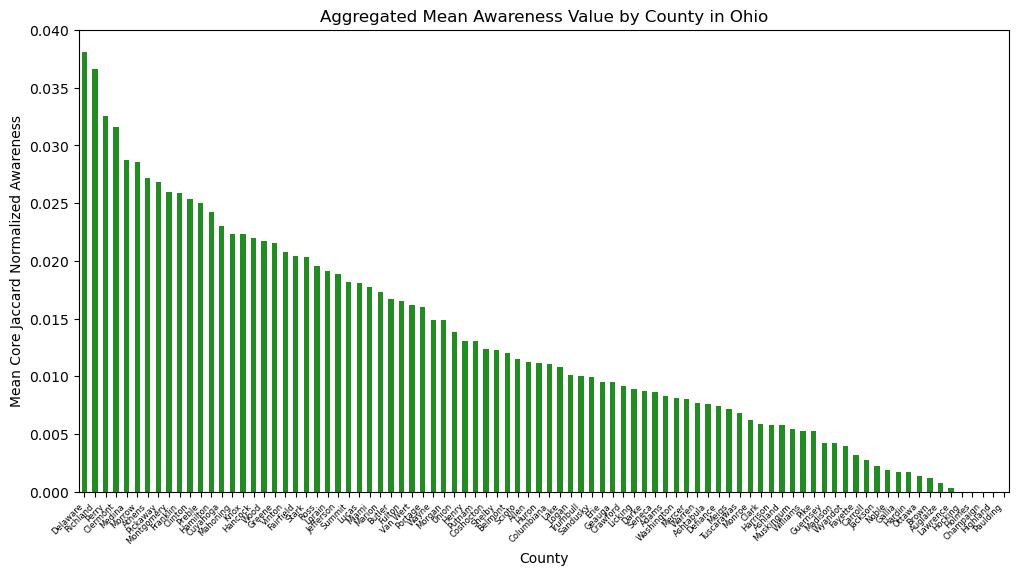

In [36]:
plt.figure(figsize=(12, 6))
core_jacc_avg.plot(kind='bar', color='forestgreen')
plt.title('Aggregated Mean Awareness Value by County in Ohio')
plt.xlabel('County')
plt.ylabel('Mean Core Jaccard Normalized Awareness')
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.show()

Delaware has the highest mean normalised jaccard similarity score. 

d) Create two county-level maps of Ohio (an example is provided in the first page of the assignment). Using colors, show the number of average Covid-19 cases per capita and the number of average Covid-19 deaths per capita by county. What are the top-5 counties with high number of per capita cases and per capita number of deaths? Summarize your observations in
around 100 words.

In [37]:
map_gdf = gpd.read_file("C:/Users/HP/Downloads/tl_2024_39_cousub/tl_2024_39_cousub.shp")

DataSourceError: C:/Users/HP/Downloads/tl_2024_39_cousub/tl_2024_39_cousub.shp: No such file or directory

In [ ]:
map_gdf.rename(columns={'NAME': 'county'}, inplace=True)

In [102]:
per_cap_df = df[['date_index_converted','cases', 'deaths','total_pop','county']]

In [103]:
per_cap_df['cases_per_capita'] = (per_cap_df['cases'] / per_cap_df['total_pop'])
per_cap_df['deaths_per_capita'] = (per_cap_df['deaths'] / per_cap_df['total_pop'])

In [104]:
avg_cases = per_cap_df.groupby('county')['cases_per_capita'].mean()
avg_deaths = per_cap_df.groupby('county')['deaths_per_capita'].mean()

merged_cases = map_gdf.merge(avg_cases.reset_index(name='avg_cases_per_capita'), on='county', how='left')
merged_deaths = map_gdf.merge(avg_deaths.reset_index(name='avg_deaths_per_capita'), on='county', how='left')

NameError: name 'map_gdf' is not defined

In [ ]:
merged_cases.head(2)

In [ ]:
#vs_luso = vs_luso_original.drop_duplicates(subset=['ID', 'STAND_INTERVAL', 'LUSO'], keep='first')

cases = merged_cases.drop_duplicates(subset=['county', 'avg_cases_per_capita'], keep='first' )
deaths = merged_deaths.drop_duplicates(subset=['county', 'avg_deaths_per_capita'], keep='first' )

<Figure size 1200x1200 with 0 Axes>

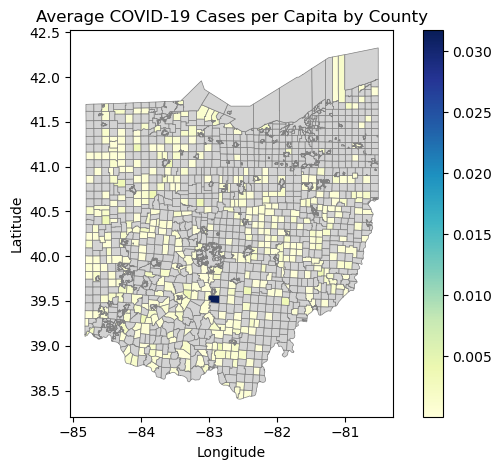

In [ ]:
# plot for cases

plt.figure(figsize=(12, 12))
merged_cases.plot(column='avg_cases_per_capita', cmap='YlGnBu', linewidth=0.5, edgecolor='gray', legend=True,
    missing_kwds={"color": "lightgray"})

plt.title('Average COVID-19 Cases per Capita by County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

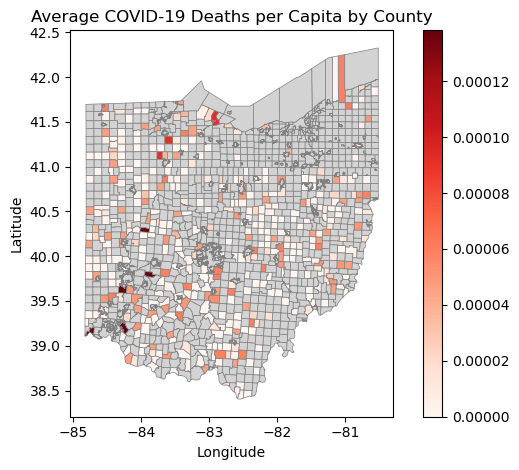

In [ ]:
# plot for deaths

plt.figure(figsize=(12, 12))
merged_deaths.plot(column='avg_deaths_per_capita', cmap='Reds', linewidth=0.5, edgecolor='gray', legend=True,
    missing_kwds={"color": "lightgray"})

plt.title('Average COVID-19 Deaths per Capita by County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

In [38]:
cases.sort_values(by='avg_cases_per_capita', ascending=False).head(5)

NameError: name 'cases' is not defined

In [ ]:
deaths.sort_values(by='avg_deaths_per_capita', ascending=False).head(5)

The top 5 counties with high number of per capita cases are:
1. Pickaway
2. Marion
3. Miami
4. Trumbull
5. Lorain

The top 5 counties with high number of per capita deaths are:
1. Miami
2. Portage 
3. Trumbull
4. Madison
5. Pickaway

e) Calculate the average normalized Jaccard awareness scores for every day (starting from Day 1). Create a line chart with overlapping lines in which each line represents the evolution of awareness levels for each topic.4 The x-axis of the line chart should correspond to ‘Days’, and the y-axis of the line chart should represent the level of awareness. What are the trends in the graph? Summarize your observations in around 100 words.

In [31]:
jaccard_cols = [col for col in df.columns if 'jaccard_normalized' in col]
daily_awareness = df.groupby('date_index_converted')[jaccard_cols].mean()


In [39]:
plt.figure(figsize=(12, 8))

for topic in jaccard_cols:
    plt.plot(daily_awareness.index, daily_awareness[topic], label=topic)

plt.title('Daily Average Normalized Jaccard Awareness Scores (Across All Counties)')
plt.xlabel('Days')
plt.ylabel('Average Normalized Jaccard Awareness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'jaccard_cols' is not defined

<Figure size 1200x800 with 0 Axes>

# Prediction

In [1071]:
df = pd.read_csv('training_data.csv')
y = df['cases']
X = df.drop('cases', axis=1)

In [1072]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['county'] = le.fit_transform(X['county'])
X['date_index_converted'] = X['date_index_converted'].str.extract('(\d+)').astype(int)

In [1073]:
# columns_to_drop = []

# for col in X.columns:
#     if any(metric in col for metric in ['jaccard', 'cosine', 'intersection']) \
#        and 'normalized' not in col:
#         columns_to_drop.append(col)

# print(f"Dropping {len(columns_to_drop)} non-normalized similarity features.")

# # Actually drop them
# X_clean = X.drop(columns=columns_to_drop)

# print(f"Original shape: {X.shape}")
# print(f"Reduced shape: {X_clean.shape}")

### 

In [1074]:
X_clean = X

In [1075]:
def drop_high_corr_features(df, threshold=0.99):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(columns=to_drop), to_drop

X_clean, dropped = drop_high_corr_features(X_clean.select_dtypes(include='number'))
X_clean.shape

(3141, 56)

In [1076]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

In [1077]:
def force_non_negative_integer(preds):
    return np.maximum(0, np.round(preds)).astype(int)

In [1078]:
#knn 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


In [1079]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    learning_rate=0.3,
    max_depth=13,
    min_child_weight=3,
    n_estimators=200,
    reg_alpha = 0.1,
    random_state=42,
    early_stopping_rounds = 50
    )

xgb.fit(
X_train, y_train,
eval_set=[(X_test, y_test)],
verbose=0
)


#values can only be non negative whole numbers
y_pred = xgb.predict(X_test)
# y_pred = np.round(np.clip(y_pred, 0, None))


print(f"Rounded XGBoost R^2 Score: {r2_score(y_test, y_pred):.4f}")

Rounded XGBoost R^2 Score: 0.9455


<Figure size 1200x800 with 0 Axes>

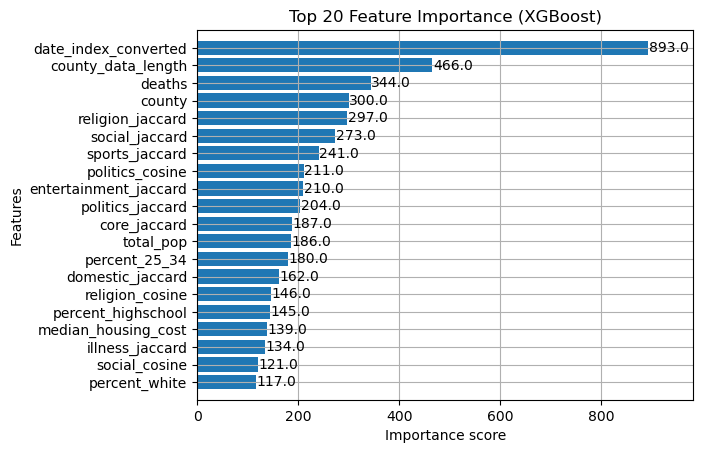

In [1080]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(xgb, importance_type='weight', max_num_features=20, height=0.8)
plt.title("Top 20 Feature Importance (XGBoost)")
plt.show()


## Importing Test Data

In [1081]:
test_df = pd.read_csv('./test_data.csv')
test_df['county'] = le.transform(test_df['county'])
test_df['date_index_converted'] = test_df['date_index_converted'].str.extract('(\d+)').astype(int)
test_df_X = test_df[X_train.columns]

In [1082]:
#predictions
test_preds = xgb.predict(test_df_X)
test_preds = np.round(np.clip(test_preds, 0, None))
test_df['preds'] = test_preds

In [1083]:
test_df.rename(columns={'index': 'Index'}, inplace=True)
test_df.set_index(keys='Index', inplace=True)
test = test_df[['preds']]
test.head()

,preds
Index,
0,0.0
1,335.0
2,0.0
3,0.0
4,1.0


In [1084]:
test.to_csv('./results_xgb.csv')
